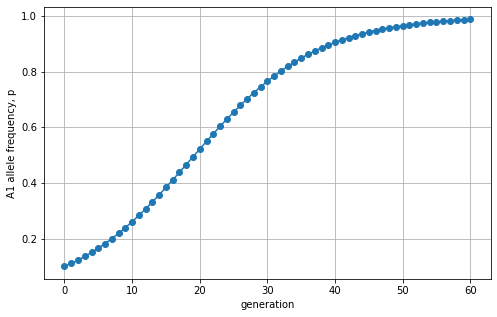

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_generations(p0, generations, W11, W12, W22):
    p_values = [p0]
    p = p0
    for i in range(generations):
        q = 1 - p
        # 平均適応度 W の計算
        W_mean = p**2 * W11 + 2 * p * q * W12 + q**2 * W22
        # 次世代の A1 の頻度
        p_next = (p**2 * W11 + p * q * W12) / W_mean
        p_values.append(p_next)
        p = p_next
    return np.array(p_values)

# パラメータ例
p0 = 0.1
generations = 60
W11 = 1.0
W12 = 0.9
W22 = 0.8

p_sim = simulate_generations(p0, generations, W11, W12, W22)

plt.figure(figsize=(8,5))
plt.plot(range(generations+1), p_sim, marker='o')
plt.xlabel('generation')
plt.ylabel('A1 allele frequency, p')
plt.grid(True)

# PDFとして出力
plt.savefig("allele frequency.pdf", format="pdf")
plt.show()

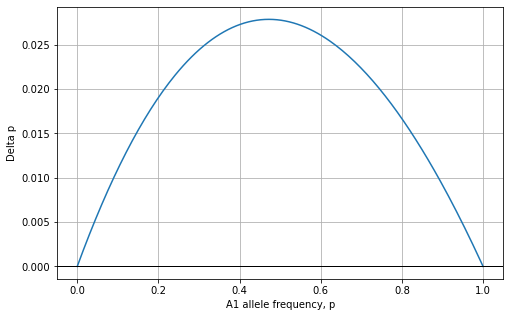

In [17]:
def delta_p(p, W11, W12, W22):
    q = 1 - p
    W_mean = p**2 * W11 + 2 * p * q * W12 + q**2 * W22
    p_next = (p**2 * W11 + p * q * W12) / W_mean
    return p_next - p

p_range = np.linspace(0, 1, 200)
dp = np.array([delta_p(p, W11, W12, W22) for p in p_range])

plt.figure(figsize=(8,5))
plt.plot(p_range, dp)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('A1 allele frequency, p')
plt.ylabel('Delta p')
plt.grid(True)

# PDFとして出力
plt.savefig("selection gradient: p to Delta p", format="pdf")
plt.show()

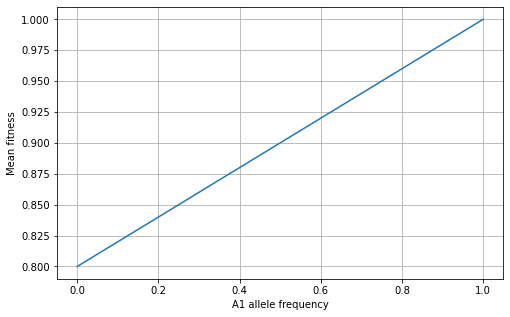

In [10]:
def mean_fitness(p, W11, W12, W22):
    q = 1 - p
    return p**2 * W11 + 2 * p * q * W12 + q**2 * W22

W_values = np.array([mean_fitness(p, W11, W12, W22) for p in p_range])

plt.figure(figsize=(8,5))
plt.plot(p_range, W_values)
plt.xlabel('A1 allele frequency')
plt.ylabel('Mean fitness')
plt.grid(True)
plt.show()

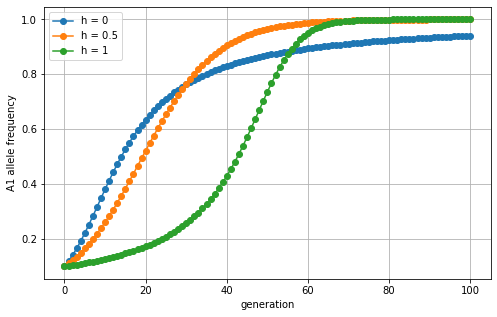

In [18]:
def simulate_generations_dominance(p0, generations, s, h):
    W11 = 1.0
    W12 = 1 - h * s
    W22 = 1 - s
    return simulate_generations(p0, generations, W11, W12, W22)

s = 0.2
h_values = [0, 0.5, 1]
p0 = 0.1
generations = 100

plt.figure(figsize=(8,5))
for h in h_values:
    p_sim = simulate_generations_dominance(p0, generations, s, h)
    plt.plot(range(generations+1), p_sim, marker='o', label=f'h = {h}')
    
plt.xlabel('generation')
plt.ylabel('A1 allele frequency')
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("allele frequency_diff par", format="pdf")
plt.show()

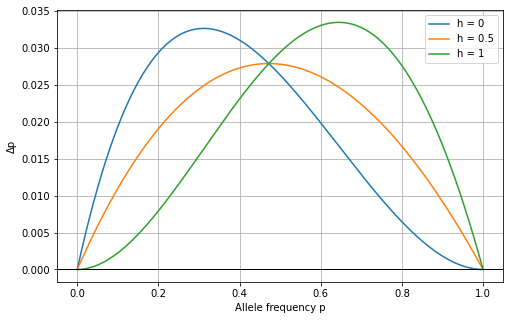

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def delta_p(p, s, h):
    """
    優性パラメータ h, 選択強度 s に基づいて、
    与えられた p での Δp = p' - p を計算する。
    W11 = 1, W12 = 1 - h*s, W22 = 1 - s とする。
    """
    # 遺伝子型の適応度
    W11 = 1.0
    W12 = 1 - h * s
    W22 = 1 - s
    
    q = 1 - p
    # 平均適応度の計算
    W_mean = p**2 * W11 + 2 * p * q * W12 + q**2 * W22
    # 次世代の A1 の頻度 (p')
    p_next = (p**2 * W11 + p * q * W12) / W_mean
    return p_next - p

# p の範囲
p_range = np.linspace(0, 1, 200)
s = 0.2
h_values = [0, 0.5, 1]  # 完全優性, 部分優性, 劣性の例

plt.figure(figsize=(8,5))
for h in h_values:
    dp_values = np.array([delta_p(p, s, h) for p in p_range])
    plt.plot(p_range, dp_values, label=f'h = {h}')
    
plt.axhline(0, color='black', linewidth=1)  # Δp=0 のラインを追加
plt.xlabel('Allele frequency p')
plt.ylabel('Δp')
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("selection gradient: p to Delta p diff par", format="pdf")
plt.show()

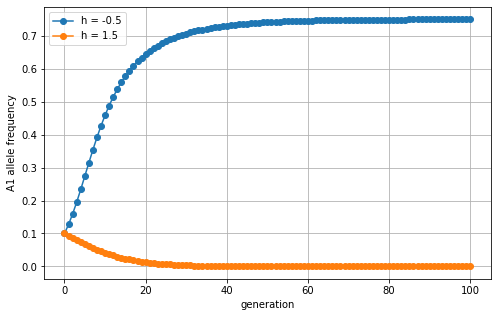

In [4]:
def simulate_generations_dominance(p0, generations, s, h):
    W11 = 1.0
    W12 = 1 - h * s
    W22 = 1 - s
    return simulate_generations(p0, generations, W11, W12, W22)

s = 0.2
h_values = [-0.5, 1.5]
p0 = 0.1
generations = 100

plt.figure(figsize=(8,5))
for h in h_values:
    p_sim = simulate_generations_dominance(p0, generations, s, h)
    plt.plot(range(generations+1), p_sim, marker='o', label=f'h = {h}')
    
plt.xlabel('generation')
plt.ylabel('A1 allele frequency')
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("allele frequency_diff par", format="pdf")
plt.show()

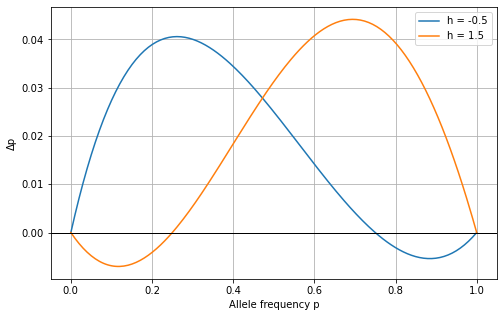

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def delta_p(p, s, h):
    """
    優性パラメータ h, 選択強度 s に基づいて、
    与えられた p での Δp = p' - p を計算する。
    W11 = 1, W12 = 1 - h*s, W22 = 1 - s とする。
    """
    # 遺伝子型の適応度
    W11 = 1.0
    W12 = 1 - h * s
    W22 = 1 - s
    
    q = 1 - p
    # 平均適応度の計算
    W_mean = p**2 * W11 + 2 * p * q * W12 + q**2 * W22
    # 次世代の A1 の頻度 (p')
    p_next = (p**2 * W11 + p * q * W12) / W_mean
    return p_next - p

# p の範囲
p_range = np.linspace(0, 1, 200)
s = 0.2
h_values = [-0.5, 1.5]  # 完全優性, 部分優性, 劣性の例

plt.figure(figsize=(8,5))
for h in h_values:
    dp_values = np.array([delta_p(p, s, h) for p in p_range])
    plt.plot(p_range, dp_values, label=f'h = {h}')
    
plt.axhline(0, color='black', linewidth=1)  # Δp=0 のラインを追加
plt.xlabel('Allele frequency p')
plt.ylabel('Δp')
plt.legend()
plt.grid(True)

# PDFとして出力
plt.savefig("selection gradient: p to Delta p diff par", format="pdf")
plt.show()